# Linear Regression with Python Scikit Learn

## **In this regression task we will predict the percentage of**
### **marks that a student is expected to score based upon the number of hours they studied.**
#### *What will be predicted score if a student study for 9.25 hrs in a day?*

### Importing the required libraries

In [5]:
#importing all necessary libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [6]:
#Reading data from remote link
url="http://bit.ly/w-data"
s_data=pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
s_data.shape

(25, 2)

In [8]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Checking the missing data**

In [11]:
s_data.isna().sum()

Hours     0
Scores    0
dtype: int64

**HENCE NO DATA IS MISSING**

**To analyse the relation between the data,we'll plot the 2-D graph to eyeball our dataset**

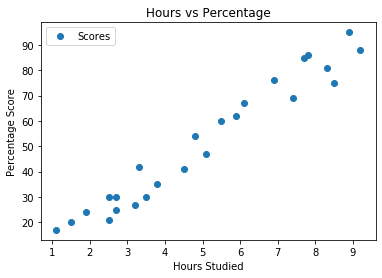

In [13]:
# Plotting The Distribution of SCORES
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the Data

###### The next step is to divide the data into "attributes" and "labels".Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied.
##### *Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column.*

In [14]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

* The above script splits 80% of the data to training set while 20% of the data to test set. The **test_size** variable is where we actually specify the proportion of test set.*

### Training the Algorithm

In [16]:
# fitting simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


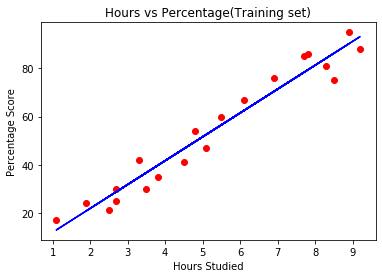

In [18]:
#Visualising the Training set result
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Hours vs Percentage(Training set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

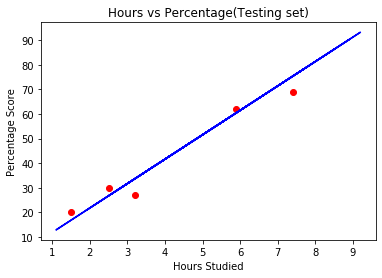

In [25]:
#Visualising the Test set results
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Hours vs Percentage(Testing set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Since the Regression line is unique in simple linear regression for both Testing and Training set. Hence the intercept and slope of the line is :**

In [26]:
print(regressor.intercept_)

2.018160041434683


In [27]:
print(regressor.coef_)

[9.91065648]


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [33]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)
y_pred                                   # Predicting the scores(the test set result)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [35]:
# Comparing Actual vs Predicted
df=pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"]) 
df

,study_hours,student_marks_original,student_marks_predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


### What will be predicted score if a student study for 9.25 hrs in a day ?

In [28]:
pred = regressor.predict([[9.25]])
pred

array([93.69173249])

## Evaluating The Model 

In [37]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
